In [1]:
import pandas as pd
#survived = target
# ignore name and passenger

In [2]:
df = pd.read_csv("titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# dropping the name and passenger column
df = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


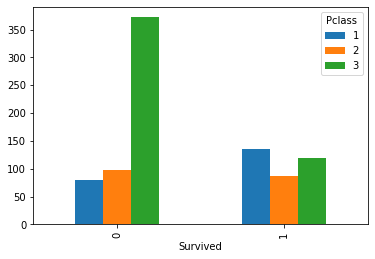

In [15]:
pd.crosstab(df.Survived,df.Pclass).plot(kind='bar')

In [5]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [6]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [7]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder


In [9]:
le_sex = LabelEncoder()

In [10]:
inputs['sex'] = le_sex.fit_transform(inputs['Sex'])
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [24]:
# to replace nan in age columns by mean of the column
age_mean = df['Age'].mean()
age_mean
inputs['Age'].fillna(age_mean,inplace=True)
inputs


,Pclass,Age,Fare,sex
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inputs,target, test_size=0.2)

,Pclass,Age,Fare,sex
372,3,19.000000,8.0500,1
300,3,29.699118,7.7500,0
800,2,34.000000,13.0000,1
140,3,29.699118,15.2458,0
454,3,29.699118,8.0500,1
...,...,...,...,...
850,3,4.000000,31.2750,1
240,3,29.699118,14.4542,0
544,1,50.000000,106.4250,1
301,3,29.699118,23.2500,1


In [25]:
from sklearn import tree

In [36]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
model.score(X_test,y_test)

0.7597765363128491

In [38]:
model.predict([[3,25,75,1]])

array([0], dtype=int64)

In [39]:
model.predict([[0,50,71,0]])

array([1], dtype=int64)